# Handwritten digits

We have a dataset with handwritten digits. Each digit is made of 64 pixels (n_features = 64).

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $M$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
from sklearn.decomposition import PCA

In [2]:
digits = datasets.load_digits() #import data digits

print(digits.images.shape)     #the digits are 1797 and each of them is made of 8x8 pixels 
print(digits.keys())           #things you can see about the dataset
print(digits.DESCR)            #description of the dataset

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 b

In [3]:
print(digits.data.shape)   #data set, each element has 64 pixels
print(digits.target.shape) #target= true solution for the data

(1797, 64)
(1797,)


Text(0.5, 1.0, '2-D data distribution: Isomap')

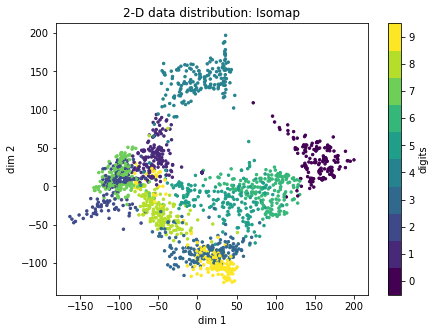

In [4]:
#reducing data from 64 to 2 components
dim_red = Isomap(n_components = 2)
transformed_data = dim_red.fit_transform(digits.data) 

fig, ax = plt.subplots(1,1, figsize=(7,5))

#plotting the 2 dimension data
plt.scatter(transformed_data[:,0], transformed_data[:,1], s =6, c = digits.target, cmap=plt.cm.get_cmap('viridis', 10) )
plt.colorbar(label='digits', ticks=range(10))
plt.clim(-0.5, 9.5)

ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_title('2-D data distribution: Isomap')

With this dimensionality reduction some groups of numbers seem to be well identified (e.g. 0, 4) while there's definitely some overlapping between some others (e.g. 7-1, 3-9). We can try to do the same thing also with PCA.

Text(0.5, 1.0, '2-D data distribution: PCA')

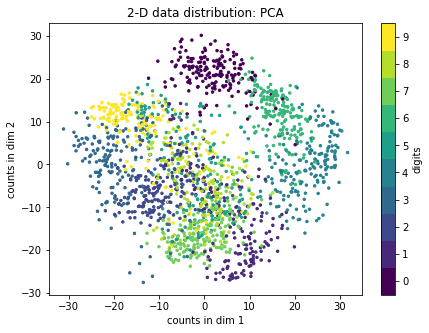

In [5]:
#reducing data from 64 to 2 components
dim_red_pca = PCA(n_components = 2)
transformed_data_pca = dim_red_pca.fit_transform(digits.data) 

fig, ax = plt.subplots(1,1, figsize=(7,5))

#plotting the 2 dimension data
plt.scatter(transformed_data_pca[:,0], transformed_data_pca[:,1], s =6, c = digits.target, cmap=plt.cm.get_cmap('viridis', 10) )
plt.colorbar(label='digits', ticks=range(10))
plt.clim(-0.5, 9.5)

ax.set_xlabel('counts in dim 1')
ax.set_ylabel('counts in dim 2')
ax.set_title('2-D data distribution: PCA')

With PCA groups aren't well defined, this is probably because in this case a linear technique is not enough to describe complex high dimensional data as the ones we are analysing. Isomap, on the other hand, is a non-linear algorithm that preserves geodesics distances between points, and in this case is more suitable.

In [6]:
print(transformed_data.shape) #just to check that everything went well

(1797, 2)


### Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [7]:
#splitting data: 80% training, 20% test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, train_size=0.8, random_state=28)
print(x_train.shape, y_train.shape)

(1437, 64) (1437,)


In [8]:
#classification algorithm
clf = LogisticRegression(solver='newton-cg', max_iter=500) 
clf.fit(x_train, y_train)

LogisticRegression(max_iter=500, solver='newton-cg')

In [9]:
#evaluating the accuracy on the training and the prediction
y_train_pred = clf.predict(x_train)
acc_pred = accuracy_score(y_train, y_train_pred)

y_test_pred = clf.predict(x_test)
acc_val  = accuracy_score(y_test, y_test_pred)

print(acc_pred, acc_val)

1.0 0.9416666666666667


All the samples in the training set were correctly identified, while in the test set the accuracy is around 94%. From the confusion matrix we can see which numbers were misclassified.

In [10]:
#confusion matrix of the training set
print(confusion_matrix(y_train, clf.predict(x_train)))

#manually computing the accuracy
trace= 0
for i in range(10):
    trace += confusion_matrix(y_train, clf.predict(x_train))[i,i]
print(trace/len(y_train))

[[147   0   0   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0   0   0]
 [  0   0 134   0   0   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0   0   0]
 [  0   0   0   0 145   0   0   0   0   0]
 [  0   0   0   0   0 157   0   0   0   0]
 [  0   0   0   0   0   0 147   0   0   0]
 [  0   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   0 148]]
1.0


In [11]:
#confusion matrix of the test set
print(confusion_matrix(y_test, clf.predict(x_test)))

#manually computing the accuracy
trace= 0
for i in range(10):
    trace += confusion_matrix(y_test, clf.predict(x_test))[i,i]
print(trace/len(y_test))

#collecting the misclassified samples
wrong = []
for i in range(len(x_test[:,0])):
    if clf.predict([x_test[i]]) != y_test[i]:
        wrong.append(i)

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  1]
 [ 0  1 41  0  0  0  0  0  1  0]
 [ 0  0  0 37  0  1  0  1  0  1]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  1 23  0  0  0  1]
 [ 0  0  0  0  0  1 33  0  0  0]
 [ 0  0  0  0  0  1  0 36  0  0]
 [ 0  2  0  0  0  3  0  0 38  0]
 [ 0  0  0  1  1  1  0  0  1 28]]
0.9416666666666667


As predicted all the 0 were corrected classify, and also 4 and 7 present just 1 misclassified sample. The 9s and 8s are commonly wrongly labeled, and as we can see from the plot of the Isomap analysis they are both in a very "crowded" region of space when we consider just two dimensions.

The number of misclassified samples is:  21


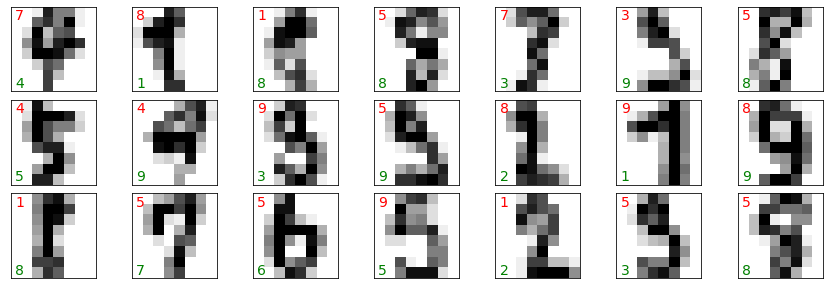

In [12]:
fig, axes = plt.subplots(3, 7, figsize=(15, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

print('The number of misclassified samples is: ' ,len(wrong))

#plotting the wrongly labeled samples. In green the correct answer, in red the wrongly predicted value
for i, ax in enumerate(axes.flat):
    ax.imshow((x_test[wrong[i]].reshape(8,8)), 
              cmap='binary')
    ax.text(0.05, 0.05, str(y_test[wrong[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.text(0.05, 0.85, str(clf.predict([x_test[wrong[i]]])[0]),transform=ax.transAxes, color='red', fontsize=14)
    
    ax.set_xticks([])
    ax.set_yticks([])

### Are all dimensions really necessary?

This is what happens if we classify our samples using all the dimensions we have. But are they really necessary? What happens if we change the number of dimensions?

In [13]:
from tqdm import tqdm

n_arr = np.array([1,2,3,4,5,6])
n_arr = np.append(n_arr, np.linspace(7,65,58)[::3])

acc_pred_n = [[] for n in range(len(n_arr))]
acc_val_n = [[] for n in range(len(n_arr))]


for n in tqdm(range(len(n_arr))):
    reduced = Isomap(n_components = n_arr[n])
    transformed_data_n = reduced.fit_transform(digits.data)
    x_train, x_test, y_train, y_test = train_test_split(transformed_data_n, 
                                                        digits.target, test_size=0.2, train_size=0.8, random_state=28)
    clf_n = LogisticRegression(random_state=28, solver='newton-cg', max_iter=500)
    clf_n.fit(x_train, y_train)
    acc_pred_n[n] = accuracy_score(y_train, clf_n.predict(x_train))
    acc_val_n[n]  = accuracy_score(y_test, clf_n.predict(x_test))


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [02:04<00:00,  4.79s/it]


Text(0, 0.5, 'Accuracy')

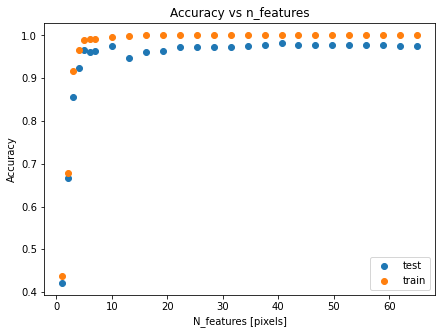

In [14]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.scatter(n_arr, acc_val_n, label = 'test')
ax.scatter(n_arr, acc_pred_n, label = 'train')
ax.legend()
ax.set_title("Accuracy vs n_features")
ax.set_xlabel('N_features [pixels]')
ax.set_ylabel('Accuracy')

It seems that the minimum amount of dimensions to get an accuracy in the test set of at least 90% is about 4, after that the accuracy seems to be almost stable with a quite high value. 

## t-SNE

Let's try to visualize data with another non-linear dimensionality reduction technique:t-SNE. It does an amazing job on this dataset! 

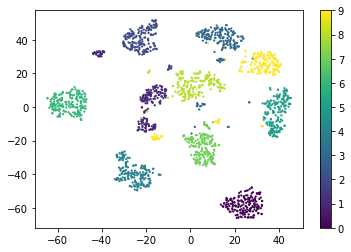

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,learning_rate=200)
X_reduced = tsne.fit_transform(digits.data)

plt.scatter(X_reduced[:,0],X_reduced[:,1], 
            c=digits.target, cmap="viridis", 
            edgecolor="None", s=5)

plt.colorbar()

If I would have an unsupervised ML problem at this point I would run a clustering algorithm as KMeans, since we know that the groups are 10 for the nature of our dataset.

In [16]:
from sklearn.cluster import KMeans

cl = KMeans(n_clusters=10)
cl.fit(X_reduced.astype('double'))


KMeans(n_clusters=10)

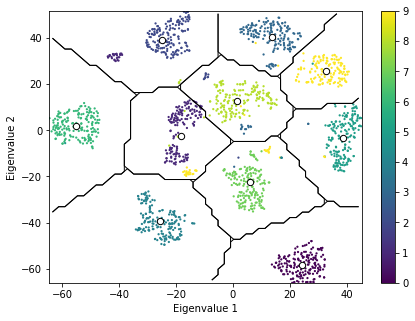

In [17]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)

plt.scatter(X_reduced[:,0],X_reduced[:,1], 
            c=digits.target, cmap="viridis", 
            edgecolor="None", s=5)

plt.colorbar()

# plot cluster centers
cluster_centers = cl.cluster_centers_
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = cl.predict(Xgrid).reshape((50, 50))

n_clusters=10
for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')

    H = cl.predict(Xgrid).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()

It performs well on these t-SNE reducted data, a part for some 9 that is clustered together with 1s and 7s, and some 3s and 1s that are just travelling around.

Let's try to use Bokeh!

In [18]:
from bokeh.plotting import *
from bokeh.models import ColumnDataSource
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.palettes import Inferno
from bokeh.transform import factor_cmap

# output to static HTML file
output_file("linked_brushing.html")

# NEW: create a column data source for the plots to share
sc = ColumnDataSource(data=dict(x0 =  X_reduced[:,0], x1 =X_reduced[:,1], labels=digits.target, x0_iso= transformed_data[:,0], 
                                   x1_iso= transformed_data[:,1]))


TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("label", "@labels"),
]

n_cmap = LinearColorMapper(palette="Viridis256", 
                             low = min(digits.target), 
                             high = max(digits.target))
bar = ColorBar(color_mapper=n_cmap, location=(0,0))


#create a new plot and add a renderer
left = figure(tools=TOOLS, tooltips=TOOLTIPS, 
              width=400, height=350, title='t-SNE dimensionality reduction',
              x_axis_label ="component 1",
              y_axis_label ="component 2")
left.circle('x0', 'x1',  source=sc, line_color=None, fill_color={'field':'labels', 'transform':n_cmap})
left.add_layout(bar, "left")

# create another new plot and add a renderer
right = figure(tools=TOOLS, tooltips=TOOLTIPS, 
               width=350, height=350, title='Isomap dimensionality reduction',
              x_axis_label ="component 1",
               y_axis_label ="component 2")
right.circle('x0_iso', 'x1_iso', source=sc, line_color=None, fill_color={'field':'labels', 'transform':n_cmap})

# put the subplots in a gridplot
p = gridplot([[left, right]])

# show the results
show(p)

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


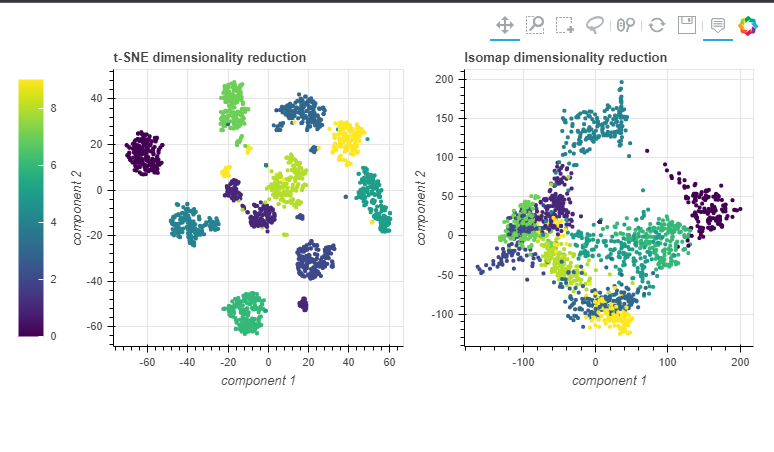

In [19]:
from IPython.display import Image
Image('bokeh.png')